# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [2]:
!python -m pip install kaggle==1.6.12


Defaulting to user installation because normal site-packages is not writeable
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.7/79.7 kB 776.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167.3/167.3 kB 2.1 MB/s eta 0:00:0000:0100:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.2/78.2 kB 8.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=69018bdec58ff2dba0f1f9adc03b0ff8c73e6103ad574aa125e0767462759daa
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --

In [3]:
!pip install --target=/workspace ucimlrepo

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.0/13.0 MB 4.5 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 508.0/508.0 kB 4.1 MB/s eta 0:00:0000:0100:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 345.4/345.4 kB 4.7 MB/s eta 0:00:0000:0100:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 229.9/229.9 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.3/16.3 MB 5.7 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement


dataset1: which data science job title with the most salaries in US dollars?

dataset2: what is the 10 most data science jobs that are in demand?

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government‚Äôs open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the Programmatically downloading file method from the hugginglearners repository.

Dataset variables:

work_year: The year in which the salary was paid

experience_level: The level of experience for the role during the work year, such as Entry-level / Junior, Mid-level / Intermediate, Senior-level / Expert, or Executive-level / Director

employment_type: The type of employment arrangement, such as Part-time, Full-time, Contract, or Freelance

job_title: The specific job role held by the employee during the work year

salary: The total gross salary amount paid to the employee

salary_currency: The currency in which the salary was paid, represented by ISO 4217 currency codes

salary_in_usd: The salary amount converted into USD for standardization and comparison, using an average USD exchange rate for the respective year

employee_residence: The employee's primary country of residence during the work year, using ISO 3166 country codes

remote_ratio: The proportion of work done remotely, ranging from no remote work to fully remote work

company_location: The country where the employer‚Äôs main office or contracting branch is located, using ISO 3166 country codes

company_size: The size of the company based on the average number of employees during the year, categorized as small, medium, or large


In [1]:
import sys
!{sys.executable} -m pip install fsspec


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
!{sys.executable} -m pip install huggingface_hub


Defaulting to user installation because normal site-packages is not writeable


In [2]:
#FILL IN 1st data gathering and loading method
import pandas as pd

salary = pd.read_csv("hf://datasets/hugginglearners/data-science-job-salaries/ds_salaries.csv")

salary.head()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

#### Dataset 2

Type: CSV File

Method: The data was gathered using the manually downloading file method from the kaggle website.

Dataset variables:

Job Title identifies the position.

Salary Estimate provides salary details.

Job Description gives a summary of the role.

Rating shows company or job rating.

Company Name specifies the organization.

Location indicates where the job is based.

Size details the company's size.

Founded provides the founding year.

Type of Ownership describes the ownership type.

Industry categorizes the company‚Äôs field of activity.

Sector gives a broader classification of the industry.

Revenue shows the financial scale of the company.



In [3]:
jobs = pd.read_csv("glassdoor_jobs.csv")
jobs.head()

Job Title  \
0                             Data Scientist   
1  2024 University Graduate - Data Scientist   
2          Data Scientist ‚Äì Entry Level 2024   
3                           Data Scientist 2   
4       Entry Level Data Scientist 2023/2024   

                         Salary Estimate  \
0                                     -1   
1  Employer Provided Salary:$83K - $153K   
2  Employer Provided Salary:$71K - $133K   
3  Employer Provided Salary:$94K - $183K   
4           $48K - $78K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Job Overview\nA Data Scientist at ExploreLearn...     4.2   
1  Our Company\n\nChanging the world through digi...     4.4   
2  Introduction\nRanked by Forbes as one of the w...     3.9   
3  The Microsoft 365 team is looking for a Data S...     4.3   
4  You may not realize it, but you‚Äôve likely used...     3.9   

                  Company Name           Location                    Size  \
0  Cambium Learning Group\n4.3             Remote  1001 to 5000 Employees   
1                   Adobe\n4.4       San Jose, CA        10000+ Employees   
2                     IBM\n3.9        Atlanta, GA        10000+ Employees   
3               Microsoft\n4.3        Redmond, WA        10000+ Employees   
4                  CPChem\n3.9  The Woodlands, TX  1001 to 5000 Employees   

   Founded  Type of ownership                                 Industry  \
0     2004  Company - Private              Primary & Secondary Schools   
1     1982   Company - Public            Computer Hardware Development   
2     1911   Company - Public  Information Technology Support Services   
3     1975   Company - Public            Computer Hardware Development   
4     2000  Company - Private                   Chemical Manufacturing   

                   Sector                           Revenue  
0               Education  $500 million to $1 billion (USD)  
1  Information Technology           $5 to $10 billion (USD)  
2  Information Technology                $10+ billion (USD)  
3  Information Technology                $10+ billion (USD)  
4           Manufacturing                $10+ billion (USD)

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [4]:
#Optional: store the raw data in your local data store
import os
import pandas as pd
import numpy as np
# Create directories if they don't exist
os.makedirs('raw data', exist_ok=True)
salary.to_csv('raw data/salary_raw.csv', index=False)
jobs.to_csv('raw data/jobs_raw.csv', index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: completness

In [5]:
#FILL IN - Inspecting the dataframe visually
jobs.sample(10)
## in some rows there is missing values which is donated by -1 

Job Title  \
347                             Clinical Data Scientist   
364                                      Data Scientist   
1125                                     DATA SCIENTIST   
1202                                     Data Scientist   
561                               Senior Data Scientist   
1295                    Forward Deployed Data Scientist   
507   Data Scientist/Machine Learning/ Artificial In...   
84                                                   -1   
243                                                  -1   
1004                                     Data Scientist   

                            Salary Estimate  \
347          $109K - $149K (Glassdoor est.)   
364           $99K - $135K (Glassdoor est.)   
1125  Employer Provided Salary:$75K - $175K   
1202                                     -1   
561          $119K - $159K (Glassdoor est.)   
1295          $97K - $155K (Glassdoor est.)   
507                                      -1   
84                                       -1   
243                                      -1   
1004                                     -1   

                                        Job Description  Rating  \
347   Responsibilities:\nWork alongside statistician...     3.9   
364   Join our collaborative and global team as a Da...     3.9   
1125  Job Description:\n\nIgnite is an ISO 9001:2015...     3.9   
1202  At Trella Health, we are passionate and commit...     4.9   
561   Do you want to build your brand by working for...     4.0   
1295  Come and change the world of AI with the Kumo ...     5.0   
507   Data Scientist/Machine Learning Scientist\nLoc...    -1.0   
84                                                   -1    -1.0   
243                                                  -1    -1.0   
1004  Analytica is seeking a remote Data Scientist t...     3.4   

                        Company Name           Location  \
347                      Otsuka\n3.9      Princeton, NJ   
364                      ABBVIE\n3.9      Worcester, MA   
1125  Ignite Fueling Innovation\n3.9         Dayton, OH   
1202              Trella Health\n4.8             Remote   
561                    Deloitte\n4.0         Boston, MA   
1295                       Kumo\n5.0  Mountain View, CA   
507               ADPMN IT SOLUTIONS        Atlanta, GA   
84                                -1                 -1   
243                               -1                 -1   
1004                  Analytica\n3.4             Remote   

                        Size  Founded  Type of ownership  \
347   1001 to 5000 Employees     1989  Company - Private   
364         10000+ Employees     2013   Company - Public   
1125     51 to 200 Employees     2001  Company - Private   
1202     51 to 200 Employees     2015  Company - Private   
561         10000+ Employees     1850  Company - Private   
1295                 Unknown       -1   Company - Public   
507                       -1       -1                 -1   
84                        -1       -1                 -1   
243                       -1       -1                 -1   
1004     51 to 200 Employees     2009  Company - Private   

                                     Industry                          Sector  \
347                 Biotech & Pharmaceuticals  Pharmaceutical & Biotechnology   
364                 Biotech & Pharmaceuticals  Pharmaceutical & Biotechnology   
1125                      Aerospace & Defense             Aerospace & Defense   
1202         Health Care Services & Hospitals                      Healthcare   
561                          Accounting & Tax              Financial Services   
1295                                       -1                              -1   
507                                        -1                              -1   
84                                         -1                              -1   
243                                        -1                              -1   
1004  Information T

In [6]:
#FILL IN - Inspecting the dataframe programmatically
missing_S = jobs[jobs["Salary Estimate"] == "-1"].shape[0]
missing_R = jobs[jobs["Rating"] == -1].shape[0]
missing_F = jobs[jobs["Founded"] == -1].shape[0]
missing_I = jobs[jobs["Industry"] == "-1"].shape[0]
missing_SE = jobs[jobs["Sector"] == "-1"].shape[0]


print("Number of missing salaries "+str(missing_S))
print("Number of missing Ratings "+str(missing_R))
print("Number of missing year of found "+str(missing_F))
print("Number of missing Industries "+str(missing_I))
print("Number of missing Sectors "+str(missing_SE))
##to see if there is null values

Number of missing salaries 375
Number of missing Ratings 270
Number of missing year of found 471
Number of missing Industries 309
Number of missing Sectors 309


Issue and justification: We have 375 missing values in the salaries column, and 270 missing values in the Ratings column, and 471 missing values in the Founded column and 309 missing values in the Industry column and 309 missing values in the sector column

### Quality Issue 2: Duplicates

In [7]:
#FILL IN - Inspecting the dataframe visually
jobs.sample(20)
##check if there is duplication by using visuall

Job Title  \
821                                      Data Scientist   
1475                    Forward Deployed Data Scientist   
1013  Data Scientist Machine Learning and Deep Learning   
1462                                     Data Scientist   
173                                      Data Scientist   
81                               Data Scientist Trainee   
289   Data Scientist, Model e Customer Business Systems   
59                                       Data Scientist   
353                   Senior Data Scientist - Analytics   
631           Data Scientist I - FP&A and StressTesting   
1044                                Lead Data Scientist   
216                              Data Scientist, RegLab   
573                             Clinical Data Scientist   
706                                      Data Scientist   
1166                              Senior Data Scientist   
63                                       Data Scientist   
1104                                Lead Data Scientist   
1231                                     Data Scientist   
354                                      Data Scientist   
1239                     Data Scientist 3 DS3 (VV) 1034   

                             Salary Estimate  \
821                                       -1   
1475           $97K - $155K (Glassdoor est.)   
1013                                      -1   
1462          $110K - $151K (Glassdoor est.)   
173            $93K - $132K (Glassdoor est.)   
81             $79K - $118K (Glassdoor est.)   
289            $94K - $126K (Glassdoor est.)   
59     Employer Provided Salary:$91K - $121K   
353   Employer Provided Salary:$123K - $195K   
631                                       -1   
1044                                      -1   
216    Employer Provided Salary:$87K - $126K   
573            $87K - $131K (Glassdoor est.)   
706           $109K - $144K (Glassdoor est.)   
1166          Employer Provided Salary:$145K   
63             $89K - $123K (Glassdoor est.)   
1104                                      -1   
1231           $91K - $129K (Glassdoor est.)   
354    Employer Provided Salary:$97K - $198K   
1239            $67K - $99K (Glassdoor est.)   

                                        Job Description  Rating  \
821   Celestar Corporation is looking to identify mu...     4.2   
1475  Come and change the world of AI with the Kumo ...     5.0   
1013  The primary purpose of this data scientist is ...     4.1   
1462  Overview:\nThe Data Scientists will take a lea...     3.0   
173   Company\nFederal Reserve Bank of Dallas\nWe ar...     4.0   
81    Overview:\nAxle Informatics is a scientific re...     3.4   
289   Ford is redefining how it will build a better ...     4.0   
59    Data Scientist\n\nPearlX Infrastructure LLC | ...     5.0   
353   About AppLovin\nAppLovin makes technologies th...     3.7   
631   Why USAA?\nAt USAA, we have an important missi...     3.4   
1044  Mosaic Data Science, located in the Northern V...     5.0   
216   Data Scientist, RegLab\nJob Code: 4745\nJob Gr...     4.2   
573   Clinical Data Scientist\n\nJoin Us. Let‚Äôs make...     4.3   
706   We are a leading financial services provider c...     4.0   
1166  Job Summary:\nWe are seeking a talented and ex...     4.3   
63    Who May Apply\n\nJob Opening: 46673. Job Posti...     4.1   
1104  Mosaic Data Science, located in the Northern V...     5.0   
1231  About InterDigital\nInterDigital develops fund...     3.8   
354   Keystone is a premier strategy and economics c...     4.0   
1239  Description\nClarity Innovations connects huma...     4.8   

                              Company Name             Location  \
821              Celestar Corporation\n4.2        United States   
1475                             Kumo\n5.0    Mountain View, CA   
1013        MD Anderson Cancer Center\n4.1          Houston, TX   
1462          Plymouth Rock Assurance\n3.0           Boston, MA   
173    Federal Reserve Bank of Dallas\n3.9          

In [8]:
jobs.duplicated().sum()
##we can see that there is 680 duplicates in the dataset

np.int64(680)

Issue and justification: there is duplicates in the data that need to be removed since it can have an impact on the statistics of the data

### Tidiness Issue 1: two values in one column

In [9]:
#FILL IN - Inspecting the dataframe visually
jobs.sample(5)
##i've noticed that the Salary Estimate column consist of 2 parts the first is the min salary and the second is the max salary, it should be splitted into 2 columns

Job Title  \
447                         Senior Data scientist   
279                      Principal Data Scientist   
681        Supply Chain Data Analytics Specialist   
1189  Data Scientist Advanced Development Program   
359     Senior Data Scientist, Sponsored Products   

                     Salary Estimate  \
447                               -1   
279                               -1   
681     $67K - $92K (Glassdoor est.)   
1189   $85K - $115K (Glassdoor est.)   
359   Employer Provided Salary:$127K   

                                        Job Description  Rating  \
447   It's fun to work in a company where people tru...     4.0   
279   Lead Data Scientist\nJoin an expert team that ...     3.3   
681   Abiomed, part of Johnson & Johnson MedTech, is...     4.2   
1189  Why join Vanguard‚Äôs Data Science Advanced Deve...     3.7   
359   5+ years of data querying languages (e.g. SQL)...     3.7   

                      Company Name          Location                    Size  \
447         Fractal Analytics\n4.0        New Jersey  1001 to 5000 Employees   
279                SpaceCurve\n3.3       Seattle, WA       1 to 50 Employees   
681         Johnson & Johnson\n4.2       Danvers, MA        10000+ Employees   
1189                 Vanguard\n3.7     Charlotte, NC        10000+ Employees   
359   Amazon.com Services LLC\n3.7  Santa Monica, CA        10000+ Employees   

      Founded  Type of ownership                       Industry  \
447      2000  Company - Private            Business Consulting   
279        -1  Company - Private  Computer Hardware Development   
681      1887   Company - Public      Biotech & Pharmaceuticals   
1189     1975  Company - Private  Investment & Asset Management   
359      1994   Company - Public        Internet & Web Services   

                              Sector                     Revenue  
447          Management & Consulting  $100 to $500 million (USD)  
279           Information Technology  Less than $1 million (USD)  
681   Pharmaceutical & Biotechnology          $10+ billion (USD)  
1189              Financial Services    Unknown / Non-Applicable  
359           Information Technology          $10+ billion (USD)

In [10]:
#FILL IN - Inspecting the dataframe programmatically
jobs.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')

Issue and justification: i've noticed that there is no min salary and max salary column and that the salary column have these two values in it

### Tidiness Issue 2: Unnecessary Columns

In [11]:
#FILL IN - Inspecting the dataframe visually
salary.head()
## i've noticed that the data have a salary and salary_in_usd column having these 2 column while they mean the same thing making the data have redunduncy
##having only one column to represt the salary is the right choise
##removing the salary column and the salary_currency column and keeping the salary in usd is the right choise since you will have one standard column representing the salaries
##and also removing the "Unnamed:0" column since it represent indexes and we already have indexes

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [12]:
#FILL IN - Inspecting the dataframe programmatically
salary.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

Issue and justification: i've noticed that the data have a salry and salary_in_usd column having these 2 column while they mean the same thing making the data have redunduncy ,having only one column to represt the salary is the right choise, removing the salary column and the salary_currency column and keeping the salary in usd is the right choise since you will have one standard column representing the salaries

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [13]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
salary_clean = salary.copy()
jobs_clean = jobs.copy()


### **Quality Issue 1: completness

In [14]:
# FILL IN - Apply the cleaning strategy

## replacing the -1 values with NaNs
jobs_clean.replace('-1', np.nan, inplace=True)
jobs_clean.replace(-1, np.nan, inplace=True)

jobs_clean=jobs_clean.dropna()
##dropping the null values

In [15]:
# FILL IN - Validate the cleaning was successful
print(jobs_clean.isna().sum().sum())
jobs_clean.sample(20)
##ensuring that there is no null values

0


Job Title  \
785                         Senior Staff Data Scientist   
404                               Senior Data Scientist   
298        Data Science Analyst I-Personalized Medicine   
1029                     Data Scientist 3 DS3 (VV) 1034   
648   Data Scientist (Faculty Assistant, Post-Doctor...   
853                               Data Engineer, Python   
1485                                     DATA SCIENTIST   
1162                                     Data Scientist   
829                                      Data Scientist   
31                                       Data Scientist   
1410            College Graduate - Data Science (BS/MS)   
12                                       Data Scientist   
1397                                     Data Scientist   
228                              Data Scientist - AI/ML   
627                                 Lead Data Scientist   
398                               Senior Data Scientist   
810                                      Data Scientist   
128                              Data Analytics Manager   
524        Supply Chain Consultant - Sr. Data Scientist   
449                  Data Scientist Engineering Modeler   

                                        Salary Estimate  \
785              Employer Provided Salary:$161K - $188K   
404              Employer Provided Salary:$145K - $185K   
298               Employer Provided Salary:$72K - $109K   
1029                       $67K - $99K (Glassdoor est.)   
648                        $58K - $89K (Glassdoor est.)   
853                       $96K - $133K (Glassdoor est.)   
1485              Employer Provided Salary:$75K - $175K   
1162                     $110K - $151K (Glassdoor est.)   
829                       $83K - $123K (Glassdoor est.)   
31               Employer Provided Salary:$105K - $157K   
1410             Employer Provided Salary:$106K - $159K   
12               Employer Provided Salary:$122K - $175K   
1397                      $85K - $125K (Glassdoor est.)   
228   Employer Provided Salary:$72.49 - $96.06 Per Hour   
627                      Employer Provided Salary:$107K   
398              Employer Provided Salary:$183K - $192K   
810               Employer Provided Salary:$82K - $140K   
128                       $70K - $106K (Glassdoor est.)   
524                       $87K - $121K (Glassdoor est.)   
449                      $115K - $167K (Glassdoor est.)   

                                        Job Description  Rating  \
785   About us\nAt Udemy, we're on a mission to impr...     4.1   
404   Endpoint is a digital title and settlement com...     3.8   
298   Description\n\nThe Augmented Intelligence in M...     3.5   
1029  Description\nClarity Innovations connects huma...     4.8   
648   Posting Details\nPosting Details\nPosition Num...     4.2   
853   Working at Breeze Airways is an exciting endea...     2.8   
1485  Job Description:\n\nIgnite is an ISO 9001:2015...     3.9   
1162  Overview:\nThe Data Scientists will take a lea...     3.0   
829   Overview:\nOasis has an exciting opportunity f...     4.4   
31    Morrison Foerster LLP, an Am Law 50 law firm w...     3.9   
1410  Job Description\n\nIntel is a company of bold ...     4.1   
12    Lawrence Berkeley National Laboratory has mult...     4.1   
1397  Overview:\nArcfield is a leading provider of f...     4.1   
228   If you're ready to be part of our legacy of ho...     3.9   
627   Details\nDepartment: Ascension Data Science In...     3.4   
398   Requisition ID: 375165\nWork Area: Customer Se...     4.4   
810   Requisition ID: 377008\nWork Area: Information...     4.4   
128   WebstaurantStore, the world‚Äôs largest online r...     3.9   
524   Supply Chain Consultant - Sr. Data Scientist\n...     4.1   
449   Job description:\nThorough understanding of st...     3.7   

                                    Company Name            Location  \
785                                   Udemy\n4.1          Denver, CO   
404         

Justification: i changed the values from -1 to nan to apply the function dropna() and remove the null values, now our dataset doesn't contain any null values

### **Quality Issue 2: Duplicates

In [16]:
#FILL IN - Apply the cleaning strategy
jobs_clean.duplicated().sum() ##check again if there is duplication after dropping null values

np.int64(283)

In [17]:
jobs_clean = jobs_clean.drop_duplicates() ##dropping duplicates

In [18]:
#FILL IN - Validate the cleaning was successful
jobs_clean.duplicated().sum()

np.int64(0)

Justification: now our data doesn't contain any duplicates, by applying the drop_duplicates() function

### **Tidiness Issue 1:2 values in one column

In [19]:
import pandas as pd
import re


# Function to extract min and max salaries
def extract_salaries(salary_estimate):
    if pd.isna(salary_estimate):
        return pd.Series([None, None])
    
    # Use regex to extract salaries and remove non-numeric characters except dash and K
    match = re.findall(r'(\d+ùêæ|\d+K)', salary_estimate)
    
    if len(match) == 2:
        min_salary = match[0].replace('K', '').replace('ùêæ', '').strip()
        max_salary = match[1].replace('K', '').replace('ùêæ', '').strip()
        
        # Convert to numeric values (thousands)
        min_salary = float(min_salary) 
        max_salary = float(max_salary)
        
        return pd.Series([min_salary, max_salary])
    else:
        return pd.Series([None, None])

In [20]:
#FILL IN - Apply the cleaning strategy
jobs_clean[['min_salary', 'max_salary']] = jobs_clean['Salary Estimate'].apply(extract_salaries) ##creating the new columns and applying the function

In [21]:
jobs_clean = jobs_clean.drop(columns="Salary Estimate") ##dropping the old column

In [22]:
jobs_clean = jobs_clean[[
    'Job Title', 'min_salary', 'max_salary', 'Job Description', 'Rating', 
    'Company Name', 'Location', 'Size', 'Founded', 
    'Type of ownership', 'Industry', 'Sector', 'Revenue'
]]
##rearranging the dataset

In [23]:
#FILL IN - Validate the cleaning was successful
jobs_clean.head()

Job Title  min_salary  max_salary  \
1  2024 University Graduate - Data Scientist        83.0       153.0   
2          Data Scientist ‚Äì Entry Level 2024        71.0       133.0   
3                           Data Scientist 2        94.0       183.0   
4       Entry Level Data Scientist 2023/2024        48.0        78.0   
6                      Senior Data Scientist       141.0       254.0   

                                     Job Description  Rating    Company Name  \
1  Our Company\n\nChanging the world through digi...     4.4      Adobe\n4.4   
2  Introduction\nRanked by Forbes as one of the w...     3.9        IBM\n3.9   
3  The Microsoft 365 team is looking for a Data S...     4.3  Microsoft\n4.3   
4  You may not realize it, but you‚Äôve likely used...     3.9     CPChem\n3.9   
6  POSITION: Senior Data Scientist\n\nJOB Locatio...     3.6       AT&T\n3.6   

            Location                    Size  Founded  Type of ownership  \
1       San Jose, CA        10000+ Employees   1982.0   Company - Public   
2        Atlanta, GA        10000+ Employees   1911.0   Company - Public   
3        Redmond, WA        10000+ Employees   1975.0   Company - Public   
4  The Woodlands, TX  1001 to 5000 Employees   2000.0  Company - Private   
6         Dallas, TX        10000+ Employees   1876.0   Company - Public   

                                  Industry                  Sector  \
1            Computer Hardware Development  Information Technology   
2  Information Technology Support Services  Information Technology   
3            Computer Hardware Development  Information Technology   
4                   Chemical Manufacturing           Manufacturing   
6              Telecommunications Services      Telecommunications   

                   Revenue  
1  $5 to $10 billion (USD)  
2       $10+ billion (USD)  
3       $10+ billion (USD)  
4       $10+ billion (USD)  
6       $10+ billion (USD)

Justification: i splitted the salary column into min salary name and max salary then made it into 2 seperate columns and then after that i removed the salary estimated column since we don't need it any more, and a rearranged the dataset

### **Tidiness Issue 2: Unnecessary Columns

In [24]:
#FILL IN - Apply the cleaning strategy
salary_clean= salary_clean[["work_year" , "experience_level", "employment_type", "job_title","salary_in_usd","employee_residence","remote_ratio","company_location","company_size"]]
##removing the salary and salary_currency columns

In [25]:
#FILL IN - Validate the cleaning was successful
salary_clean.head()

work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary_in_usd employee_residence  remote_ratio company_location  \
0          79833                 DE             0               DE   
1         260000                 JP             0               JP   
2         109024                 GB            50               GB   
3          20000                 HN             0               HN   
4         150000                 US            50               US   

  company_size  
0            L  
1            S  
2            M  
3            S  
4            L

Justification: removing the salary and salary currency columns made the dataset much clear and ease to read.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [26]:
#FILL IN - Remove unnecessary variables and combine datasets
salary1 = salary_clean[["work_year","experience_level","employment_type","job_title","salary_in_usd","remote_ratio"]]
jobs1 = jobs_clean[["Job Title","min_salary","max_salary","Rating","Company Name","Size"]]

combined_data = pd.concat([salary1, jobs1], axis=1)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [27]:
#FILL IN - saving data
import os
import pandas as pd
os.makedirs('cleaned data', exist_ok=True)
salary_clean.to_csv('cleaned data/salary_clean_data_cleaned.csv',index=False)
jobs_clean.to_csv('cleaned data/jobs_clean_data_cleaned.csv', index=False)
combined_data.to_csv('cleaned data/combined_data_cleaned.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* which data science job title with the most salaries in US dollars?

<Axes: xlabel='job_title'>

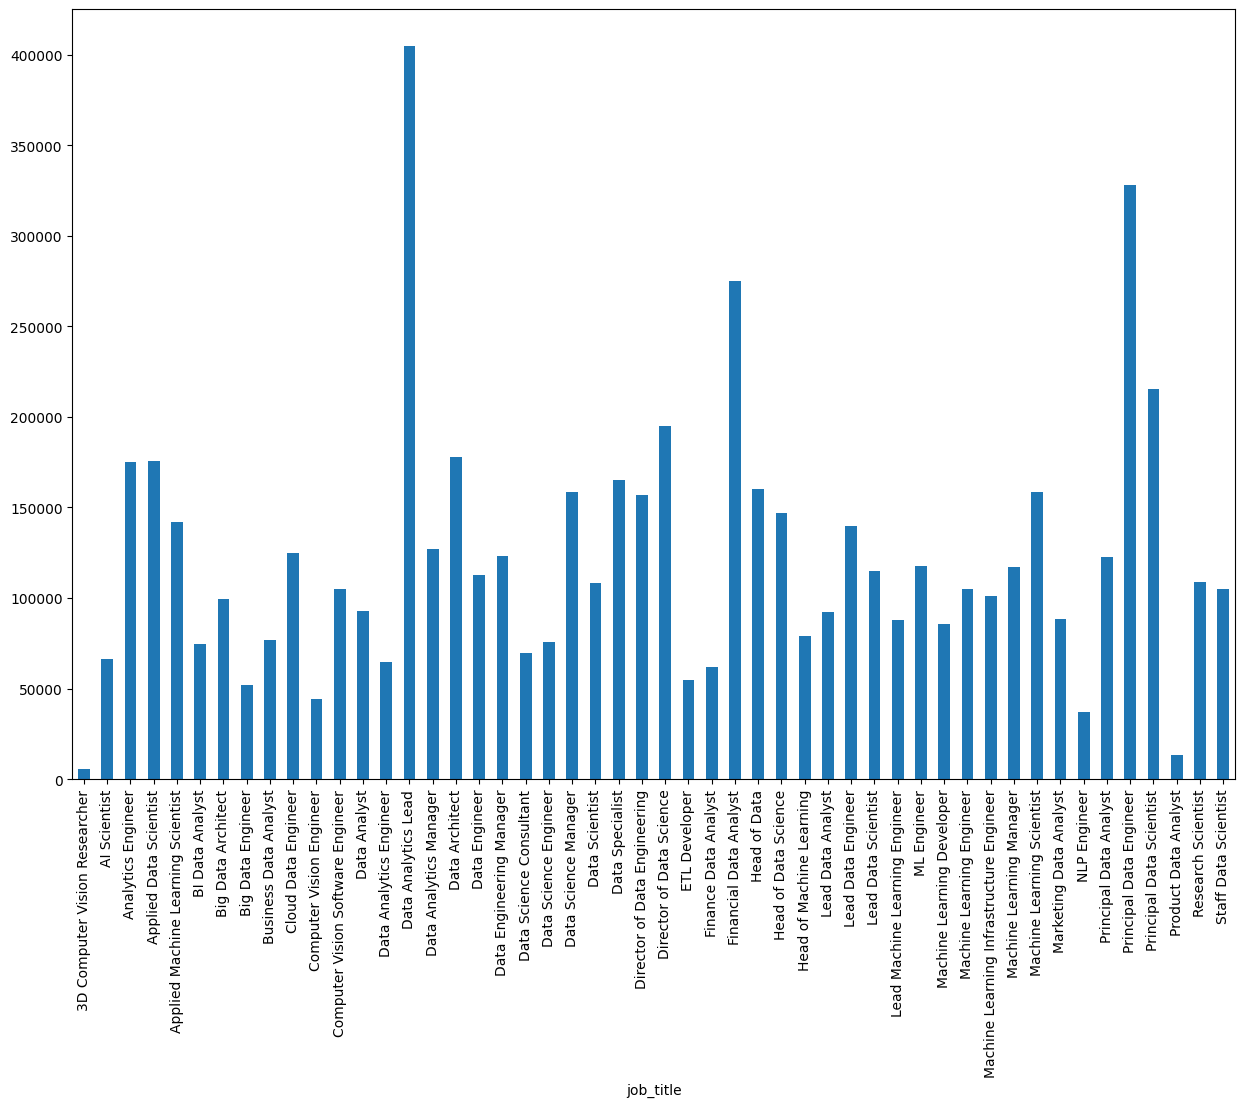

In [28]:
#Visual 1 - FILL IN
import matplotlib.pyplot as plt


salary_clean.groupby("job_title")["salary_in_usd"].mean().plot(kind="bar", figsize=(15, 10))

##a graph to show which job title makes the most in the data sience field

*Answer to research question: this graph explains and answer the question, the job title that earns you the most is Data Analytics Lead

*Research question:* are the percentage of females that survived is more then men?

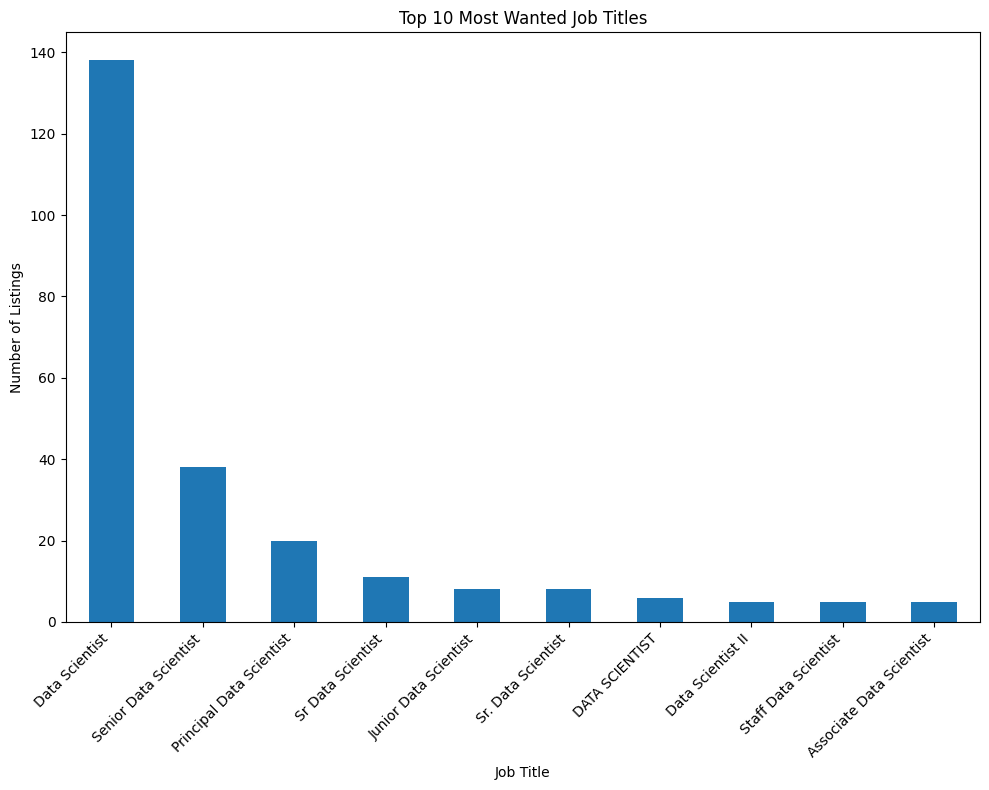

In [29]:
#Visual 2 - FILL IN
job_counts = jobs_clean['Job Title'].value_counts()

# Select top 10 job titles
top_10_jobs = job_counts.head(10)


plt.figure(figsize=(10, 8))
top_10_jobs.plot(kind='bar')
plt.title('Top 10 Most Wanted Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Answer to research question: the data shows that the jobs in the graph are the top 10 most wanted jobs, and that the job title data scientist is the most wanted one

### **5.2:** Reflection


*Answer:* If I had more time to complete the project, I would delve deeper into data quality issues, such as handling missing values and verifying data consistency across the data science jobs and data science salaries datasets. I would also investigate and explore salary disparities based on job titles, locations, and experience levels in the data science salaries dataset, aiming to uncover trends and patterns that could inform career decisions.